In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_AB.csv')

In [5]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [6]:
df.duplicated(subset = 'user id').sum()

0

In [10]:
df.drop(['Unnamed: 0' , 'user id'], axis = 1, inplace = True )

In [11]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [12]:
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


In [13]:
for i in df_cat.columns:
  print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


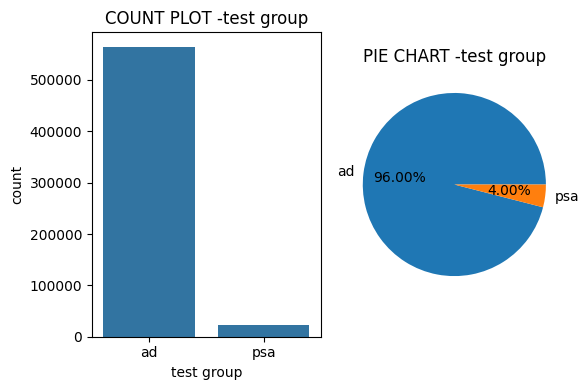

<Figure size 640x480 with 0 Axes>

In [18]:
#univariate


variable = 'test group'

plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable , data= df_cat)
plt.title(f'COUNT PLOT -{variable}')

plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'PIE CHART -{variable}')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

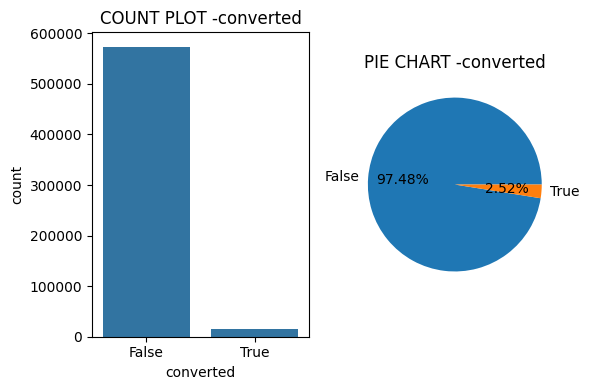

<Figure size 640x480 with 0 Axes>

In [19]:

variable = 'converted'

plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable , data= df_cat)
plt.title(f'COUNT PLOT -{variable}')

plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'PIE CHART -{variable}')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

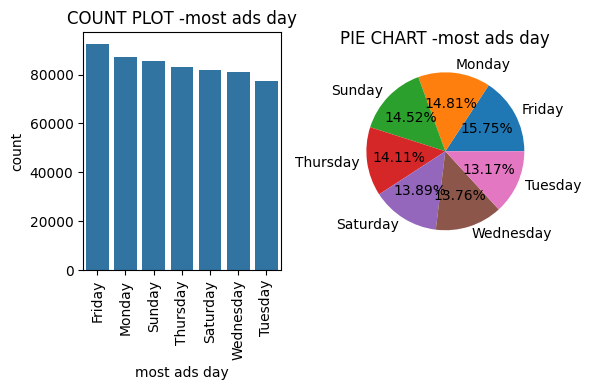

<Figure size 640x480 with 0 Axes>

In [20]:

variable = 'most ads day'

plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable , data= df_cat, order = df_cat['most ads day'].value_counts().index)
plt.title(f'COUNT PLOT -{variable}')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'PIE CHART -{variable}')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

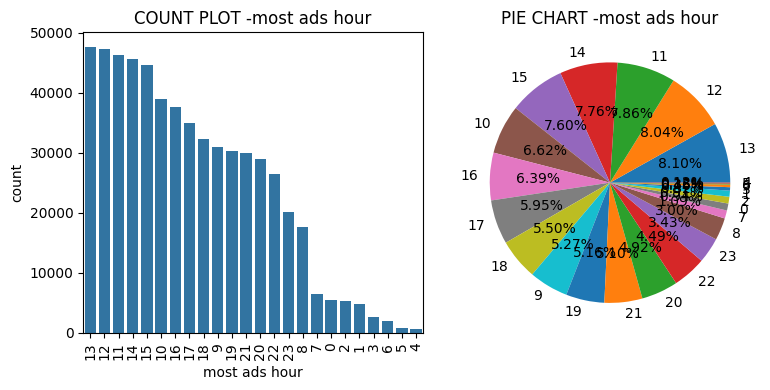

<Figure size 640x480 with 0 Axes>

In [22]:

variable = 'most ads hour'

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.countplot(x= variable , data= df_cat, order = df_cat['most ads hour'].value_counts().index)
plt.title(f'COUNT PLOT -{variable}')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'PIE CHART -{variable}')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

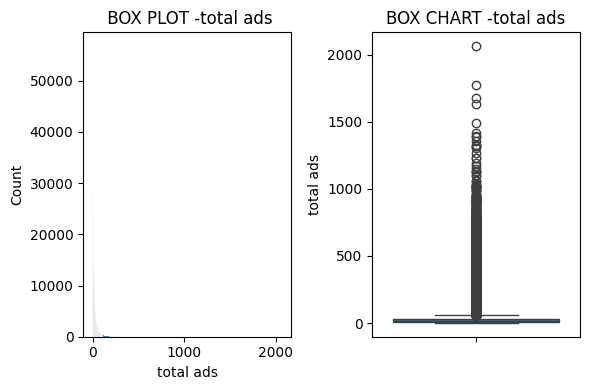

In [24]:
variable = 'total ads'

plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.histplot(x= variable , data= df)
plt.title(f' BOX PLOT -{variable}')


plt.subplot(1,2,2)
sns.boxplot(y = variable , data = df)
plt.title(f'BOX CHART -{variable}')

plt.tight_layout()
plt.show()

In [25]:
df['total ads'].describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


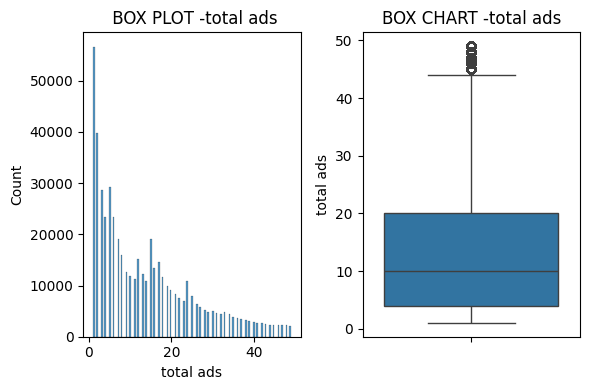

In [26]:
variable = 'total ads'

plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.histplot(x= variable , data= df[df['total ads']<50])
plt.title(f' BOX PLOT -{variable}')


plt.subplot(1,2,2)
sns.boxplot(y = variable , data = df[df['total ads']<50])
plt.title(f'BOX CHART -{variable}')

plt.tight_layout()
plt.show()

In [29]:
#bivariate


ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


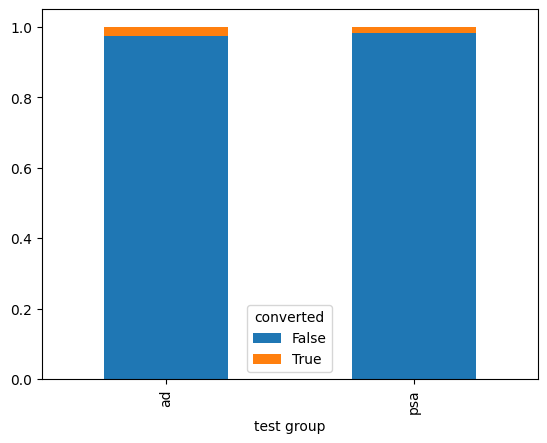

In [30]:
ct_conversion_test_group.plot(kind = 'bar', stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


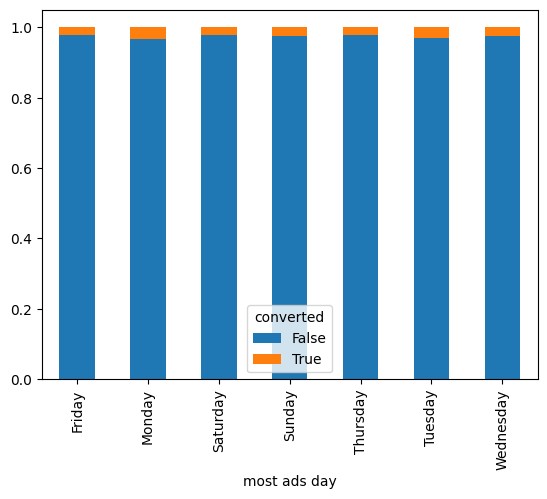

In [32]:
ct_conversion_day= pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by = True, ascending = False))
ct_conversion_day.plot(kind = 'bar', stacked = True);

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


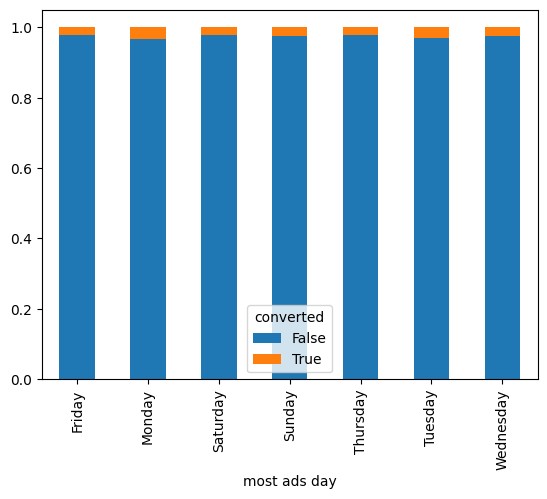

In [33]:
ct_conversion_hour= pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values(by = True, ascending = False))
ct_conversion_day.plot(kind = 'bar', stacked = True);

<Axes: xlabel='converted', ylabel='total ads'>

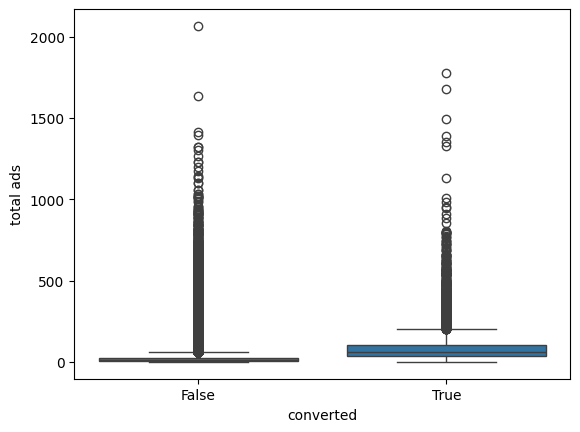

In [35]:
sns.boxplot(x = 'converted', y = 'total ads', data = df)

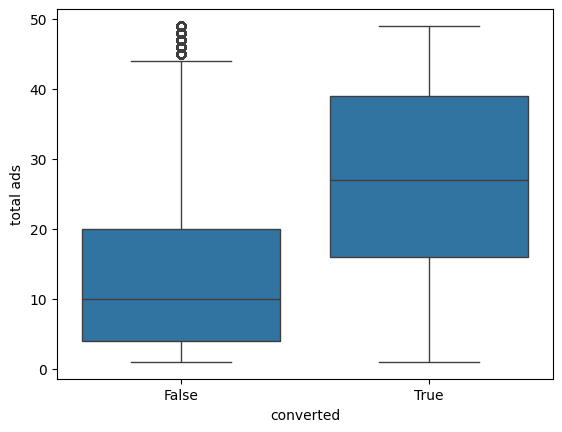

In [37]:
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads']<50]);

In [38]:
#Statistical Tests

from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
  if variable != 'converted':
  #Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

    #Perform chi-squared test
    chi2, p, _, _= chi2_contingency (contingency_table)

    #Display the results
    print(f"\nChi-squared test for (variable) vs. converted:")
    print(f"Chi-squared value: (chi2)")
    print(f"p-value: {p}")

    #Check for significance
    if p < alpha:
      print(f"The difference in conversion rates across (variable) is statistically significant.")
    else:
      print(f"There is no significant difference in conversion rates across (variable).")


Chi-squared test for (variable) vs. converted:
Chi-squared value: (chi2)
p-value: 1.9989623063390075e-13
The difference in conversion rates across (variable) is statistically significant.

Chi-squared test for (variable) vs. converted:
Chi-squared value: (chi2)
p-value: 1.932184379244731e-85
The difference in conversion rates across (variable) is statistically significant.

Chi-squared test for (variable) vs. converted:
Chi-squared value: (chi2)
p-value: 8.027629823696771e-77
The difference in conversion rates across (variable) is statistically significant.


In [47]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [43]:
#Step 1: Check Assumptions

#Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

#Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")


Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
Levene's test for equality of variances: p-value = 0.0


In [46]:
# Step 2: Perform a Suitable Test

alpha = 0.05
if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
  #Assumptions met use t-test for means
  t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']] ['total ads'])
  print (f"Independent two-sample t-test: p-value = {t_p_value}")
else:
  #Assumptions not met use Mann-Whitney U test for medians
  u_stat, u_p_value = mannwhitneyu(df [df ['converted']] ['total ads'], df [df ['converted']] ['total ads'])
  print(f"Mann-Whitney U test: p-value {u_p_value}")

Mann-Whitney U test: p-value 1.0
